Importação das bibliotecas necessárias:

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 

# 0. Carregamento dos Datasets:

primeiramente é importante fornecer as legendas para cada Dataset:

dfd: Dataframe demográfico, nele estão contidas informações como: idade, escolaridade, registro de tratamento, etc.

dfh: Dataframe histopatológico, nele estão contidas informações como: diagnósticos primários, receptor de estrogênio , receptor de progesterona, HER2 por IHC, HER2 por fish, etc.

dfpa: Dataframe peso e altura, nele estão contidas informações como: peso, altura, IMC.

dfrt: Dataframe do registro do tumor, nele estão contidas informações como: data do diagnóstico, estágio clínico, data da reicidiva, reicidiva , lateralidade do tumor, etc.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfd = pd.read_csv("/content/drive/MyDrive/drive-download-20230214T160637Z-001/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.csv")
dfh = pd.read_csv("/content/drive/MyDrive/drive-download-20230214T160637Z-001/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv")
dfpa = pd.read_csv("/content/drive/MyDrive/drive-download-20230214T160637Z-001/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv")
dfrt = pd.read_csv("/content/drive/MyDrive/drive-download-20230214T160637Z-001/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv")

In [3]:
## Pasta Luis
dfrt = pd.read_csv('/content/drive/MyDrive/Projetos/FMUSP/Dados/Raw/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv')
dfpa = pd.read_csv('/content/drive/MyDrive/Projetos/FMUSP/Dados/Raw/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv')
dfh = pd.read_csv('/content/drive/MyDrive/Projetos/FMUSP/Dados/Raw/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv')
dfd = pd.read_csv('/content/drive/MyDrive/Projetos/FMUSP/Dados/Raw/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.csv')

# 1.0 Limpeza dos dados:

Bem, primeiramente é importante entendermos o motivo de fazer a limpeza dos dados previamente. Nesse sentido, fazer a limpeza inicial dos dados é importante antes de começar a explorá-los e tratá-los porque os dados brutos geralmente contêm valores faltantes, valores inválidos, duplicatas, inconsistências, entre outros problemas que podem afetar negativamente as análises subsequentes. Se esses problemas não forem tratados antes de prosseguir com a análise, eles podem resultar em conclusões imprecisas ou enganosas.

## Renomeando colunas

In [4]:
# Renomeando as colunas dataframe demográfico
dfd = dfd.rename(columns={
                          'Record ID':'record_id', 
                          'Repeat Instrument':'repeat_instrument', 
                          'Repeat Instance':'repeat_instance', 
                          'Escolaridade':'escolaridade',
                          'Idade do paciente ao primeiro diagnóstico':'idade_primeiro_diagnostico', 
                          'Sexo':'sexo',
                          'Raça declarada (Biobanco)':'raca', 
                          'UF de nascimento do paciente':'UF_nascimento',
                          'UF de residência do paciente':'UF_residencia',
                          'Data da última informação sobre o paciente':'data_da_ultima_informacao',
                          'Última informação do paciente':'ultima_informacao',
                          'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]':'tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci',
                          'Já ficou grávida?':'engravidou', 
                          'Quantas vezes ficou gráfida?':'quantas_vezes_ficou_gravida', 
                          'Número de partos':'numero_partos',
                          'Idade na primeira gestação':'idade_primeira_gestacao', 
                          'Abortou':'abortou',
                          'Amamentou na primeira gestação?':'amamentou_na_primeira_gestacao', 
                          'Por quanto tempo amamentou?':'tempo_de_amamentacao',
                          'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não)': 'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_nao',
                          'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, apenas 1 caso)': 'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_1_grau_apenas_1_caso',
                          'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, mais de 1 caso)': 'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_1_grau_mais_1_caso',
                          'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, apenas 1 caso)': 'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_apenas_1_caso',
                          'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, mais de 1 caso)': 'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_mais_1_caso',
                          'Idade da primeira mentruação': 'idade_primeira_menstruacao',
                          'Faz uso de métodos contraceptivo?':'usou_contraceptivo?',
                          'Qual método? (choice=Pílula anticoncepcional)':'qual_metodo_choice_pilula_anticoncepcional',
                          'Qual método? (choice=DIU)':'qual_metodo_choice_diu', 
                          'Qual método? (choice=camisinha)':'qual_metodo_choice_camisinha',
                          'Qual método? (choice=outros)':'qual_metodo_choice_outros', 
                          'Qual método? (choice=não informou)':'qual_metodo_choice_nao_informou',
                          'Já fez uso de drogas?':'ja_usou_droga?', 
                          'Atividade Física':'atividade_fisica', 
                          'Consumo de tabaco':'consumo_tabaco',
                          'Consumo de álcool':'consumo_alcool', 
                          'Possui histórico familiar de câncer?':'tem_historico_de_cancer?',
                          'Grau de parentesco de familiar com cancer? (choice=primeiro (pais, irmãos, filhos))':'grau_parentesco_familiar_com_cancer_choice_primeiro_pais_irmaos_filhos',
                          'Grau de parentesco de familiar com cancer? (choice=segundo (avós, tios e netos))':'grau_parentesco_familiar_com_cancer_choice_segundo_avos_tios_netos',
                          'Grau de parentesco de familiar com cancer? (choice=terceiro (bisavós, tio avós, primos, sobrinhos))':'grau_parentesco_familiar_com_cancer_choice_terceiro_bisavos_tio_avos_primos_sobrinhos',
                          'Regime de Tratamento':'tratamento', 
                          'Hormonioterapia ':'hormonioterapia', 
                          'Data da cirurgia':'data_cirurgia',
                          'Tipo de terapia anti-HER2 neoadjuvante':'tipo_terapia_anti-her2_neoadjuvante', 
                          'Radioterapia':'radioterapia',
                          'Data de início do tratamento quimioterapia':'data_de_inicio_quimioterapia',
                          'Esquema de hormonioterapia':'esquema_hormonioterapia',
                          'Data do início Hormonioterapia adjuvante':'data_do_inicio_hormonioterapia_adjuvante',
                          'Data de início da Radioterapia':'data_inicio_radioterapia'
                          })

# Renomeando colunas dataframe registro do tumor
dfrt = dfrt.rename(columns={   
                            'Record ID': 'record_id',
                            'Repeat Instrument': 'repeat_instrument',
                            'Repeat Instance': 'repeat_instance',
                            'Data da primeira consulta institucional [dt_pci]': 'data_da_primeira_consulta_institucional_dt_pci',
                            'Data do diagnóstico': 'data_do_diagnostico',
                            'Código da Topografia (CID-O)': 'codigo_da_topografia_cid_o',
                            'Código da Morfologia de acordo com o CID-O': 'codigo_da_morfologia_cid_o',
                            'Estadio Clínico  ': 'estadio_clinico',
                            'Grupo de Estadio Clínico': 'grupo_estadio_clinico',
                            'Classificação TNM Clínico - T': 'classificacao_tnm_clinico_t',
                            'Classificação TNM Clínico - N': 'classificacao_tnm_clinico_n',
                            'Classificação TNM Clínico - M': 'classificacao_tnm_clinico_m',
                            'Metastase ao DIAGNOSTICO - CID-O #1': 'metastase_diagnostico_cid_o_1',
                            'Metastase ao DIAGNOSTICO - CID-O #2': 'metastase_diagnostico_cid_o_2',
                            'Metastase ao DIAGNOSTICO - CID-O #3': 'metastase_diagnostico_id_o_3',
                            'Metastase ao DIAGNOSTICO - CID-O #4': 'metastase_diagnostico_cid_o_4',
                            'Data do tratamento': 'data_do_tratamento',
                            'Combinação dos Tratamentos Realizados no Hospital': 'combinacao_dos_tratamentos_realizados_no_hospital',
                            'Ano do diagnostico': 'ano_do_diagnostico',
                            'Lateralidade do tumor': 'lateralidade_do_tumor',
                            'Data de Recidiva': 'data_recidiva',
                            'Tempo desde o diagnóstico até a primeira recidiva  ': 'tempo_desde_o_diagnostico_ate_primeira_recidiva_',
                            'Local de Recidiva a  distancia/ metastase #1 - CID-O - Topografia': 'local_recidiva_a _distancia_metastase_1_cid_o_topografia',
                            'Local de Recidiva a  distancia/ metastase #2 - CID-O - Topografia': 'local_recidiva_a _distancia_metastase_2_cid_o_topografia',
                            'Local de Recidiva a  distancia/ metastase #3 - CID-O - Topografia': 'local_recidiva_a _distancia_metastase_3_cid_o_topografia',
                            'Local de Recidiva a  distancia/ metastase #4 - CID-O - Topografia': 'local_recidiva_a _distancia_metastase_4_cid_o_topografia',
                            'Descrição da Morfologia de acordo com o CID-O  (CID-O - 3ª edição)': 'descricao_da_morfologia_acordo_com_o_cid_o_cid_o_3_edicao',
                            'Descrição da Topografia ': 'descricao_da_topografia_',
                            'Classificação TNM Patológico - N': 'classificacao_tnm_patologico_n',
                            'Classificação TNM Patológico - T': 'classificacao_tnm_patologico_t',
                            'Com recidiva à distância': 'com_recidiva_distancia',
                            'Com recidiva regional': 'com_recidiva_regional',
                            'Com recidiva local': 'com_recidiva_local'
                            })

# Renomeando colunas do dataframe de dados histopatológicos
dfh = dfh.rename(columns={
                          'Record ID': 'record_id',
                          'Repeat Instrument': 'repeat_instrument',
                          'Repeat Instance': 'repeat_instance',
                          'Diagnostico primario (tipo histológico)': 'diagnostico_primario_tipo_histologico',
                          'Grau histológico': 'grau_histologico',
                          'Subtipo tumoral': 'subtipo_tumoral',
                          'Receptor de estrogênio': 'receptor_estrogenio',
                          'Receptor de progesterona': 'receptor_progesterona',
                          'Ki67 (>14%)': 'ki67_maior14pct',
                          'Receptor de progesterona (quantificação %)': 'receptor_progesterona_quantificacao_pct',
                          'Receptorde Estrogênio (quantificação %)': 'receptorde_estrogenio_quantificacao_pct',
                          'Indice H (Receptorde progesterona)': 'indice_h_receptorde_progesterona',
                          'HER2 por IHC': 'her2_por_ihc',
                          'HER2 por FISH': 'her2_por_fish',
                          'Ki67 (%)': 'ki67_pct'
                          })

# Renomeando colunas do dataframe de peso e altura
dfpa = dfpa.rename(columns={
                            'Record ID': 'record_id',
                            'Repeat Instrument': 'repeat_instrument',
                            'Repeat Instance': 'repeat_instance',
                            'Data: ': 'data',
                            'Peso': 'peso',
                            'Altura (em centimetros)': 'altura_em_centimetros',
                            'IMC': 'imc'
})



In [6]:
# Remoção de colunas não informativas
removidas = ['repeat_instrument',
             'repeat_instance',
             'UF_nascimento',
             'UF_residencia',
             'numero_partos',
             'data_do_inicio_hormonioterapia_adjuvante',
             'qual_metodo_choice_diu',
             'qual_metodo_choice_camisinha',
             'qual_metodo_choice_outros',
             'qual_metodo_choice_nao_informou',
             'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_apenas_1_caso',
             'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_mais_1_caso']

for col in removidas:
  informacoes = dfd[col].unique()
  print(f'os dados na coluna {col} são:{informacoes}')
  print('\n')

print('numero_partos:', dfd['numero_partos'].unique(),'\n')
print('data_do_inicio_hormonioterapia_adjuvante', dfd['data_do_inicio_hormonioterapia_adjuvante'].unique(),'\n')

dfd = dfd.drop(['repeat_instrument',
                'repeat_instance',
                'UF_nascimento',
                'UF_residencia',
                'data_do_inicio_hormonioterapia_adjuvante',
                'numero_partos',
                'qual_metodo_choice_diu',
                'qual_metodo_choice_camisinha',
                'qual_metodo_choice_outros',
                'qual_metodo_choice_nao_informou',
                'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_apenas_1_caso',
                'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_mais_1_caso', 
                'usou_contraceptivo?'], axis=1)

os dados na coluna repeat_instrument são:[nan]


os dados na coluna repeat_instance são:[nan]


os dados na coluna UF_nascimento são:[nan 'SP']


os dados na coluna UF_residencia são:[nan 'SP']


os dados na coluna numero_partos são:[nan  2.  1.]


os dados na coluna data_do_inicio_hormonioterapia_adjuvante são:[nan '2013-01-07' '2021-06-24']


os dados na coluna qual_metodo_choice_diu são:['Unchecked']


os dados na coluna qual_metodo_choice_camisinha são:['Unchecked']


os dados na coluna qual_metodo_choice_outros são:['Unchecked']


os dados na coluna qual_metodo_choice_nao_informou são:['Unchecked']


os dados na coluna historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_apenas_1_caso são:['Unchecked']


os dados na coluna historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_mais_1_caso são:['Unchecked']


numero_partos: [nan  2.  1.] 

data_do_inicio_hormonioterapia_adjuvante [nan '2013-01-07' '20

Após uma análise dos conteúdos de cada coluna, removeremos as colunas com nenhuma informação , assim como as que possuem apenas um tipo de dado e as que possuem menos de 5 linhas preenchidas, tendo em vista que não estão nos "dizendo" nada:


* repeat_instrument(possui apenas NaN)

* repeat_instance(possui apenas NaN)

* UF_nascimento(possui apenas NaN e SP)

* UF_residencia(possui apenas NaN e SP)

* numero_partos(possui apenas 2 linhas preenchidas)

* data_do_inicio_hormonioterapia_adjuvante(possui apenas 2 linhas preenchidas)

* qual_metodo_choice_diu(tem apenas "unchecked")

* qual_metodo_choice_camisinha(tem apenas "unchecked")

* qual_metodo_choice_outros(tem apenas "unchecked")

* qual_metodo_choice_nao_informou(tem apenas "unchecked")

* usou_contraceptivo?(possui apenas 3 linhas preenchidas, ou seja , 99.9 % das linhas estão vazias)

* historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_apenas_1_caso(tem apenas "unchecked")

* repeat_instrument da tabela dfh(possui apenas um tipo de dado)

* repeat_instrument da tabela dfpa(possui apenas um tipo de dado)

* repeat_instrument da tabela dfrt(possui apenas um tipo de dado)

* Remoção de linhas com todas as colunas Nan, ou seja, linhas vazias:

In [7]:
# Remover as linhas com todas as colunas vazias, exceto record_id
dfd = dfd.dropna(subset=list(dfd.columns)[1:], how='all')

#Outra maneira de realizar essa remoção, ele irá remover todas as linhas que tem apenas 1 (UMA) coluna preenchida
dfh = dfh.dropna(thresh=2)

## Tratando Missings

### Tratamento de Missings da tabela dfrt (registro do tumor):

In [8]:
# Verificando a porcentagem de nulos por coluna
dfrt = dfrt.dropna(subset=list(dfrt.columns)[1:], how='all')
dfrt.shape
dfrt.isnull().mean() * 100

record_id                                                     0.000000
repeat_instrument                                             0.000000
repeat_instance                                               0.000000
data_da_primeira_consulta_institucional_dt_pci                0.000000
data_do_diagnostico                                           0.000000
codigo_da_topografia_cid_o                                    0.000000
codigo_da_morfologia_cid_o                                    0.000000
estadio_clinico                                               0.000000
grupo_estadio_clinico                                         5.601882
classificacao_tnm_clinico_t                                   0.000000
classificacao_tnm_clinico_n                                   0.000000
classificacao_tnm_clinico_m                                   0.000000
metastase_diagnostico_cid_o_1                                84.755185
metastase_diagnostico_cid_o_2                                91.682703
metast

In [10]:
dfd['idade_primeira_menstruacao'] = np.where((dfd['idade_primeira_menstruacao'].isnull()) , 13 , dfd['idade_primeira_menstruacao']) #13 é a idade média de menstruação no Brasil, não usamos a média, mediana ou moda da coluna, pois essa estava com poucos dados


### Tratamento de Missings da tabela dfd (dados demográficos):

In [12]:
# Verificando a porcentagem de nulos por coluna
dfd.isnull().mean().sort_values(ascending=False)
# as colunas tratamento, data de inicio quimioterapia, data inicio radioterapia , data cirurgia e radioterapia poderão ser tratados quando o merge com a tabela dfrt for feito

hormonioterapia                                                                                                 0.999298
esquema_hormonioterapia                                                                                         0.997191
quantas_vezes_ficou_gravida                                                                                     0.989700
abortou                                                                                                         0.987828
ja_usou_droga?                                                                                                  0.965122
tem_historico_de_cancer?                                                                                        0.955524
consumo_alcool                                                                                                  0.952247
consumo_tabaco                                                                                                  0.950375
raca                            

#### Tratando missings da coluna "tem_historico_de_cancer?":

In [13]:
dfd['tem_historico_de_cancer?'] = dfd['tem_historico_de_cancer?'].fillna('Não informado')

#### Tratando missings da coluna "raca":

In [14]:
correlacao = dfd['raca'].value_counts(normalize=True)
random = np.random.choice(correlacao.index, size=dfd['raca'].isnull().sum(), p=correlacao.values)
dfd['raca'] = dfd['raca'].fillna(pd.Series(random))

#### Tratando missings da coluna "sexo":

In [15]:
dfd['sexo'] = dfd['sexo'].fillna('Feminino')

#### Tratando os missings da coluna "idade_primeiro_diagnostico":

In [17]:
idade_diag_moda = dfd['idade_primeiro_diagnostico'].mode()
dfd['idade_primeiro_diagnostico'] = np.where((dfd['idade_primeiro_diagnostico'].isnull()), idade_diag_moda, dfd['idade_primeiro_diagnostico'])

#### Tratando missings da coluna "data_da_ultima_informacao":

In [18]:
dfd['data_da_ultima_informacao'] = np.where((dfd['data_da_ultima_informacao'].isnull()) , dfd['data_cirurgia'] , dfd['data_da_ultima_informacao'])

#### Tratando missings da coluna "tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci":

In [19]:
dfd['tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci'] = dfd['tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci'].fillna(1407)#esse valor é a moda de menor valor(existem duas modas)

#### Tratando missings das colunas "consumo_alcool" e "consumo_tabaco":

In [20]:
dfd['consumo_alcool'] = dfd['consumo_alcool'].fillna('não-informado')
dfd['consumo_tabaco'] = dfd['consumo_tabaco'].fillna('não-informado')

#### Tratando missings da coluna "escolaridade":

In [21]:
dfd['escolaridade'] = dfd['escolaridade'].fillna('IGNORADA')

#### Tratando missings da coluna "atividade_fisica":

In [22]:
dfd['atividade_fisica'] = dfd['atividade_fisica'].fillna('não-informado')

#### Tratando missings da coluna "ja_usou_droga?":

In [23]:
dfd['ja_usou_droga?'] = dfd['ja_usou_droga?'].fillna('não-informado')

#### Tratando missings das colunas "engravidou", "amamentou_na_primeira_gestação", "tempo_de_amamentacao":

In [24]:
dfd['engravidou'] = np.where((dfd['engravidou'].isnull()) & (dfd['amamentou_na_primeira_gestacao'] == 'Sim'), 'Sim' , dfd['engravidou'])
dfd['engravidou'] = np.where((dfd['engravidou'].isnull()) & (dfd['amamentou_na_primeira_gestacao'] == 'Não'), 'Não' , dfd['engravidou'])
dfd['engravidou'] = np.where((dfd['engravidou'].isnull()) & (dfd['tempo_de_amamentacao'] > 0), 'Sim' , dfd['engravidou'])
dfd['engravidou'] = np.where((dfd['engravidou'].isnull()) & (dfd['sexo'] == 'Masculino'), 'Não' , dfd['engravidou'])

dfd['amamentou_na_primeira_gestacao'] = np.where((dfd['amamentou_na_primeira_gestacao'].isnull()) & (dfd['tempo_de_amamentacao'] > 0), 'Sim' , dfd['amamentou_na_primeira_gestacao'])
dfd['amamentou_na_primeira_gestacao'] = np.where((dfd['amamentou_na_primeira_gestacao'].isnull()) & (dfd['engravidou'] == 'Sim'), 'Sim' , dfd['amamentou_na_primeira_gestacao'])#visto que a maioria das mulheres que engravidaram amamentaram na primeira gestação em comparação com as que não amamentaram forma uma relação de 782/136
dfd['amamentou_na_primeira_gestacao'] = np.where((dfd['amamentou_na_primeira_gestacao'].isnull()) & (dfd['engravidou'] == 'Não'), 'Não' , dfd['amamentou_na_primeira_gestacao'])
dfd['tempo_de_amamentacao'] = np.where((dfd['tempo_de_amamentacao'].isnull()) & (dfd['amamentou_na_primeira_gestacao'] == 'Sim'), dfd['tempo_de_amamentacao'].mode(), dfd['tempo_de_amamentacao'])
dfd['tempo_de_amamentacao'] = np.where((dfd['tempo_de_amamentacao'].isnull()) & (dfd['amamentou_na_primeira_gestacao'] == 'Não'), 0 , dfd['tempo_de_amamentacao'])
dfd['tempo_de_amamentacao'] = np.where((dfd['tempo_de_amamentacao'].isnull()) & (dfd['engravidou'] == 'Não'), 0 , dfd['tempo_de_amamentacao'])

dfd['engravidou'] = np.where((dfd['engravidou'].isnull()), "Não informado" , dfd['engravidou'])
dfd['amamentou_na_primeira_gestacao'] = np.where((dfd['amamentou_na_primeira_gestacao'].isnull()), "Não informado" , dfd['amamentou_na_primeira_gestacao'])
dfd['tempo_de_amamentacao'] = np.where((dfd['tempo_de_amamentacao'].isnull()), 0 , dfd['tempo_de_amamentacao'])


#### Tratando missings da coluna "quantas_vezes_ficou_gravida":

In [25]:
moda = dfd['quantas_vezes_ficou_gravida'].mode()
dfd['quantas_vezes_ficou_gravida'] = np.where((dfd['quantas_vezes_ficou_gravida'].isnull()) & (dfd['engravidou'] == 'Sim'), moda , dfd['quantas_vezes_ficou_gravida'])
dfd['quantas_vezes_ficou_gravida'] = np.where((dfd['quantas_vezes_ficou_gravida'].isnull()) & (dfd['engravidou'] == 'Não'), 0 , dfd['quantas_vezes_ficou_gravida'])
dfd['quantas_vezes_ficou_gravida'] = np.where((dfd['quantas_vezes_ficou_gravida'].isnull()) & (dfd['engravidou'] == 'não informado'), 0 , dfd['quantas_vezes_ficou_gravida'])


#### Tratando missings da coluna "abortou":

In [26]:
dfd['abortou'] = np.where((dfd['abortou'].isnull()) & (dfd['amamentou_na_primeira_gestacao'] == 'Sim') | (dfd['tempo_de_amamentacao'] > 0) , 'Não' , dfd['abortou'])
dfd['abortou'] = np.where((dfd['abortou'].isnull()) & (dfd['sexo'] == 'Masculino') , 'Não(homem)' , dfd['abortou'])
dfd['abortou'] = np.where((dfd['abortou'].isnull()) , 'Não-informado' , dfd['abortou'])

#### Tratando missings da coluna "ultima_informacao":

In [27]:
# Analisando manualmente vimos que essa coluna possui apenas duas linhas vazias, verificando na outra tabela vimos que um dos pacientes teve metastase para diversos orgãos e a outra não retornou ao hospital, indicando que não realizou o tratamento
dfd['ultima_informacao'] = dfd['ultima_informacao'].fillna('Obito por câncer')

#### Tratando missings da coluna "idade_primeira_menstruacao":

In [28]:
dfd['idade_primeira_menstruacao'] = np.where((dfd['idade_primeira_menstruacao'].isnull()) , 13 , dfd['idade_primeira_menstruacao']) 
# 13 é a idade média de menstruação no Brasil, não usamos a média, mediana ou moda da coluna, pois essa estava com poucos dados
#ATENÇÃO: quando for fazer o encoding, devemos substituir o idade_primeira_menstruação das linhas que tem o 'sexo' == Masculino por "não-menstrua"


#### Tratando missings das colunas "radioterapia", "data_inicio_radioterapia" , 'data_de_inicio_quimioterapia" , "tratamento", "esquema_hormonioterapia", "hormonioterapia" , "data_cirurgia":

Merge entre algumas colunas da tabela de registro do tumor (dfrt) e algumas da tabela de dados demográficos (dfd) pois na dfrt tem informações que completarão as colunas citadas acima.

In [30]:
# Merge entre as colunas requeridas
colunas_dfrt = dfrt
colunas_dfd = dfd[['record_id', 'tratamento', 'radioterapia', 'data_inicio_radioterapia', 'data_de_inicio_quimioterapia', 'esquema_hormonioterapia', 'hormonioterapia' , 'data_cirurgia']]
merge_colunas = pd.merge(colunas_dfrt, colunas_dfd, on='record_id', how= 'right')

#### Tratando os missings da coluna "radioterapia":

In [32]:
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Cirurgia + Radio + Quimio'), 'Sim' , merge_colunas['radioterapia'])
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Cirurgia + Radio + Quimio + Hormonio'), 'Sim' , merge_colunas['radioterapia'])
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Cirurgia + Radioterapia'), 'Sim' , merge_colunas['radioterapia'])
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Radioterapia + Quimioterapia'), 'Sim' , merge_colunas['radioterapia'])
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Radioterapia'), 'Sim' , merge_colunas['radioterapia'])
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'] == 'Não') & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Radioterapia'), 'Sim' , merge_colunas['radioterapia'])
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'] == 'Não') & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Cirurgia + Radio + Quimio + Hormonio'), 'Sim' , merge_colunas['radioterapia'])
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Cirurgia + Quimioterapia'), 'Não' , merge_colunas['radioterapia'])
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Quimioterapia'), 'Não' , merge_colunas['radioterapia'])
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Nenhum tratamento'), 'Não' , merge_colunas['radioterapia'])
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Cirurgia'), 'Não' , merge_colunas['radioterapia'])
merge_colunas['radioterapia'] = np.where((merge_colunas['radioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Outras combinações'), 'Não' , merge_colunas['radioterapia'])

# Agora faremos a coluna radioterapia da tabela dfd receber a coluna radioterapia da tabela merge_colunas, que ja está tratada
dfd['radioterapia'] = merge_colunas['radioterapia']

#### Tratando os missings da coluna "data_cirurgia":

In [36]:
merge_colunas['data_cirurgia'] = np.where((merge_colunas['data_cirurgia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Cirurgia'), merge_colunas['data_do_tratamento'] , merge_colunas['data_cirurgia'])
dfd['data_cirurgia'] = merge_colunas['data_cirurgia']
dfd['data_cirurgia'] = dfd['data_cirurgia'].fillna("Não informado")

#### Tratando os missings da coluna "data_inicio_radioterapia":

In [38]:
merge_colunas['data_inicio_radioterapia'] = np.where((merge_colunas['data_inicio_radioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Radioterapia'), merge_colunas['data_do_tratamento'] , merge_colunas['data_inicio_radioterapia'])
dfd['data_inicio_radioterapia'] = merge_colunas['data_inicio_radioterapia']
dfd['data_inicio_radioterapia'] = dfd['data_inicio_radioterapia'].fillna("Não informado")

#### Tratando os missings da coluna "data_de_inicio_quimioterapia":

In [40]:
merge_colunas['data_de_inicio_quimioterapia'] = np.where((merge_colunas['data_de_inicio_quimioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Quimioterapia'), merge_colunas['data_do_tratamento'] , merge_colunas['data_de_inicio_quimioterapia'])
dfd['data_de_inicio_quimioterapia'] = merge_colunas['data_de_inicio_quimioterapia'] #com isso resgatamos cerca de 130 linhas
dfd['data_de_inicio_quimioterapia'] = dfd['data_de_inicio_quimioterapia'].fillna("Não informado")

#### Tratando os missings da coluna "esquema_hormonioterapia":

In [41]:
merge_colunas['esquema_hormonioterapia'] = np.where((merge_colunas['esquema_hormonioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] != 'Cirurgia + Radio + Quimio + Hormonio') & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] != 'Outras combinações'), "Não realizou" , merge_colunas['esquema_hormonioterapia'])
merge_colunas['esquema_hormonioterapia'] = np.where((merge_colunas['esquema_hormonioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Outras combinações'), "Não informado" , merge_colunas['esquema_hormonioterapia'])
#aqui faremos um preenchimento com uma distribuição aleatória dos valores, pois a contagem dos dados para essa coluna está muito perto para cada um dos dados.
proporcoes = merge_colunas['esquema_hormonioterapia'].value_counts(normalize=True)
valores_aleatorios = np.random.choice(proporcoes.index, size=merge_colunas['esquema_hormonioterapia'].isnull().sum(), p=proporcoes.values)
dfd['esquema_hormonioterapia'] = merge_colunas['esquema_hormonioterapia']
dfd['esquema_hormonioterapia'] = dfd['esquema_hormonioterapia'].fillna(pd.Series(valores_aleatorios))


#### Tratando os missings da coluna "hormonioterapia":

In [42]:
merge_colunas['hormonioterapia'] = np.where((merge_colunas['hormonioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Cirurgia + Radio + Quimio + Hormonio') & (merge_colunas['tratamento'] == 'Terapia Adjuvante') , 'Adjuvante' , merge_colunas['hormonioterapia'])
merge_colunas['hormonioterapia'] = np.where((merge_colunas['hormonioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Cirurgia + Radio + Quimio + Hormonio') & (merge_colunas['tratamento'] == 'Terapia Neoadjuvante') , 'Neoadjuvante' , merge_colunas['hormonioterapia'])
merge_colunas['hormonioterapia'] = np.where((merge_colunas['hormonioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Outras combinações'), "Não informado" , merge_colunas['hormonioterapia'])
merge_colunas['hormonioterapia'] = np.where((merge_colunas['hormonioterapia'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] != 'Cirurgia + Radio + Quimio + Hormonio') & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] != 'Outras combinações'), "Não realizou" , merge_colunas['hormonioterapia'])
dfd['hormonioterapia'] = merge_colunas['hormonioterapia']
dfd['hormonioterapia'] = dfd['hormonioterapia'].fillna('Não informado')


#### Tratando os missings da coluna "tratamento":

In [43]:
merge_colunas['tratamento'] = np.where((merge_colunas['tratamento'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Radioterapia') , 'Radioterapia' , merge_colunas['tratamento'])
merge_colunas['tratamento'] = np.where((merge_colunas['tratamento'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Quimioterapia') , 'Quimioterapia' , merge_colunas['tratamento'])
merge_colunas['tratamento'] = np.where((merge_colunas['tratamento'].isnull()) & (merge_colunas['combinacao_dos_tratamentos_realizados_no_hospital'] == 'Nenhum tratamento') , 'Nenhum tratamento' , merge_colunas['tratamento'])
dfd['hormonioterapia'] = merge_colunas['hormonioterapia']

### Tratamento de Missings da tabela dfpa (dados peso e altura):

In [68]:
dfpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55654 entries, 0 to 55653
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   record_id              55654 non-null  int64  
 1   repeat_instrument      51382 non-null  object 
 2   repeat_instance        51382 non-null  float64
 3   data                   51354 non-null  object 
 4   peso                   45178 non-null  float64
 5   altura_em_centimetros  49928 non-null  float64
 6   imc                    51334 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ MB


In [69]:
##Retirando a coluna Repeat_Instrument
dfpa = dfpa.drop("repeat_instrument", axis='columns')

#Retirando todas as que possuem todas colunas nulas
dfpa = dfpa.dropna(thresh = 2)
dfpa

,record_id,repeat_instance,data,peso,altura_em_centimetros,imc
1,302,1.0,2009-03-06,58.00,NaN,inf
2,302,2.0,2009-01-23,57.00,158.0,22.8
3,302,3.0,2009-02-06,57.00,158.0,22.8
4,302,4.0,2009-12-25,62.00,158.0,24.8
5,302,5.0,2011-07-09,57.75,158.0,23.1
...,...,...,...,...,...,...
55648,82205,3.0,2021-06-09,140.00,172.0,47.3
55649,82205,4.0,2021-02-28,135.85,174.0,44.9
55650,82205,5.0,2021-07-12,124.10,174.0,41.0
55652,82240,1.0,2020-12-08,80.35,161.0,31.0


In [70]:
#Tabela reserva para teste
dfpaTEST = dfpa.copy()

In [71]:
dfpa.reset_index()

# Criando uma lista que irá receber todos os valores novos da altura
new_altura = []

# Tratando os nan
def missing_altura(data):
  mode_mean = data['altura_em_centimetros'].mode(dropna=True).mean()
  data['altura_em_centimetros'] = data['altura_em_centimetros'].replace(np.nan, mode_mean)

# padronizando a altura de cada paciente
def standardize_altura(data):
  mode_mean = data['altura_em_centimetros'].mode(dropna=True).mean()

  for i in data['altura_em_centimetros']:
    if i < mode_mean or i > mode_mean:
      data['altura_em_centimetros'] = data['altura_em_centimetros'].replace(i, mode_mean)
    new_altura.append(i)

# função que irá ser chamada pelo apply
def treatment_altura(data):
  missing_altura(data)
  standardize_altura(data)

# agrupando em subconjuntos pelo Record_Id, tratando os dados levando em consideração um paciente
dfpa_groupby = dfpa.groupby(['record_id']).apply(treatment_altura)

In [72]:
# Tratando os elementos restantes
dfpa['New_Altura'] = new_altura
dfpa['New_Altura'] = dfpa['New_Altura'].replace(np.nan, dfpa['New_Altura'].mode(dropna=True).mean())
dfpa['New_Altura'] = dfpa['New_Altura'].replace(0, dfpa['New_Altura'].mode(dropna=True).mean())
dfpa['New_Altura'] = dfpa['New_Altura'].replace(78, dfpa['New_Altura'].mode(dropna=True).mean())
dfpa = dfpa.drop(columns='altura_em_centimetros')
dfpa = dfpa.rename(columns = {'New_Altura':'altura_em_centimetros'})
dfpa.head()

,record_id,repeat_instance,data,peso,imc,altura_em_centimetros
1,302,1.0,2009-03-06,58.00,inf,158.0
2,302,2.0,2009-01-23,57.00,22.8,158.0
3,302,3.0,2009-02-06,57.00,22.8,158.0
4,302,4.0,2009-12-25,62.00,24.8,158.0
5,302,5.0,2011-07-09,57.75,23.1,158.0


In [73]:
# Tratando os pesos a partir do agrupamento dos pacientes pelo seu Record_ID
def missing_peso(data):
  if len(data) == 1:
    return data

  else:
    data['peso'] = data['peso'].replace(np.nan, data['peso'].median())
    for i in data['peso']:
      if i >= data['peso'].mean()+data['peso'].std()*3 or i < data['peso'].mean()-data['peso'].std()*3:
        data['peso'] = data['peso'].replace(i, data['peso'].mean())
    return data


dfpa = dfpa.groupby(['record_id']).apply(missing_peso)
dfpa['peso'] = dfpa['peso'].replace(np.nan, dfpa['peso'].mode().mean())
dfpa['peso'] = dfpa['peso'].replace(1, dfpa['peso'].mode().mean())

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

In [74]:
# Recalculando o IMC com os novos dados
def imc(row):
  row['imc'] = (row['peso']/(row['altura_em_centimetros']**2))*10000
  return row
dfpa = dfpa.apply(imc, axis = 1)
dfpa

,record_id,repeat_instance,data,peso,imc,altura_em_centimetros
1,302,1.0,2009-03-06,58.00,23.233456,158.0
2,302,2.0,2009-01-23,57.00,22.832879,158.0
3,302,3.0,2009-02-06,57.00,22.832879,158.0
4,302,4.0,2009-12-25,62.00,24.835763,158.0
5,302,5.0,2011-07-09,57.75,23.133312,158.0
...,...,...,...,...,...,...
55648,82205,3.0,2021-06-09,140.00,47.322877,172.0
55649,82205,4.0,2021-02-28,135.85,44.870525,174.0
55650,82205,5.0,2021-07-12,124.10,40.989563,174.0
55652,82240,1.0,2020-12-08,80.35,30.998032,161.0


In [75]:
# Ordena a partir da data e retorna o resultado da primeira consulta
def agrupamento(data):
  data = data.sort_values(by='data', ascending = True)
  return data.iloc[0]

dfpa = dfpa.groupby(by='record_id', as_index = False).apply(agrupamento)
dfpa

,record_id,repeat_instance,data,peso,imc,altura_em_centimetros
0,302,20.0,2009-01-02,57.80,23.153341,158.0
1,710,18.0,2008-07-12,61.00,25.390219,155.0
2,752,2.0,2009-12-03,84.00,36.357341,152.0
3,1367,1.0,2010-04-28,57.90,28.314343,143.0
4,1589,12.0,2009-04-03,63.20,22.661264,167.0
...,...,...,...,...,...,...
3798,82123,5.0,2021-02-07,85.40,36.481695,153.0
3799,82124,1.0,2020-11-10,81.10,35.568615,151.0
3800,82131,1.0,2020-11-01,71.40,29.152079,156.5
3801,82205,4.0,2021-02-28,135.85,44.870525,174.0


In [77]:
dfpat = dfpaTEST.groupby(by='record_id', as_index = False).apply(agrupamento)
dfpat

,record_id,repeat_instance,data,peso,altura_em_centimetros,imc
0,302,20.0,2009-01-02,57.80,158.0,23.2
1,710,18.0,2008-07-12,61.00,156.0,25.1
2,752,2.0,2009-12-03,84.00,152.0,36.4
3,1367,1.0,2010-04-28,57.90,143.0,28.3
4,1589,12.0,2009-04-03,63.20,167.0,22.7
...,...,...,...,...,...,...
3798,82123,5.0,2021-02-07,85.40,153.0,36.5
3799,82124,1.0,2020-11-10,81.10,151.0,35.6
3800,82131,1.0,2020-11-01,71.40,156.5,29.2
3801,82205,4.0,2021-02-28,135.85,174.0,44.9


In [80]:
#Entendendo a diferença a tabela com e sem o tratamento do dropna 
dfall = dfpat.merge(dfpa.drop_duplicates(), on=['record_id'], 
                   how='left', indicator=True)
dfall[dfall['_merge'] == 'left_only']

,record_id,repeat_instance_x,data_x,peso_x,altura_em_centimetros_x,imc_x,repeat_instance_y,data_y,peso_y,imc_y,altura_em_centimetros_y,_merge


###Tratamento de Missings da tabela dfh (Dados Histopatológicos)

In [82]:
dfh.head()

,record_id,repeat_instrument,repeat_instance,diagnostico_primario_tipo_histologico,grau_histologico,subtipo_tumoral,receptor_estrogenio,receptor_progesterona,ki67_maior14pct,receptor_progesterona_quantificacao_pct,receptorde_estrogenio_quantificacao_pct,indice_h_receptorde_progesterona,her2_por_ihc,her2_por_fish,ki67_pct
1,302,Dados Histopatologicos Mama,1.0,NaN,NaN,5.0,positivo,positivo,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
3,710,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,20.0
5,752,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
7,1367,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,positivo,positivo,5,60,10.0,0 (negativo),NaN,40.0
8,1367,Dados Histopatologicos Mama,2.0,NaN,NaN,5.0,positivo,negativo,positivo,NaN,30,NaN,+++ (positivo),NaN,40.0


In [81]:
dfh['repeat_instance'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17.])

In [83]:
dfh=dfh.drop([2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092])
dfh.head()

,record_id,repeat_instrument,repeat_instance,diagnostico_primario_tipo_histologico,grau_histologico,subtipo_tumoral,receptor_estrogenio,receptor_progesterona,ki67_maior14pct,receptor_progesterona_quantificacao_pct,receptorde_estrogenio_quantificacao_pct,indice_h_receptorde_progesterona,her2_por_ihc,her2_por_fish,ki67_pct
1,302,Dados Histopatologicos Mama,1.0,NaN,NaN,5.0,positivo,positivo,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
3,710,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,20.0
5,752,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
7,1367,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,positivo,positivo,5,60,10.0,0 (negativo),NaN,40.0
8,1367,Dados Histopatologicos Mama,2.0,NaN,NaN,5.0,positivo,negativo,positivo,NaN,30,NaN,+++ (positivo),NaN,40.0


In [84]:
dfh = dfh.sort_values(by=['record_id', 'repeat_instance'], ascending=[True, True])
dfh


,record_id,repeat_instrument,repeat_instance,diagnostico_primario_tipo_histologico,grau_histologico,subtipo_tumoral,receptor_estrogenio,receptor_progesterona,ki67_maior14pct,receptor_progesterona_quantificacao_pct,receptorde_estrogenio_quantificacao_pct,indice_h_receptorde_progesterona,her2_por_ihc,her2_por_fish,ki67_pct
1,302,Dados Histopatologicos Mama,1.0,NaN,NaN,5.0,positivo,positivo,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
3,710,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,20.0
5,752,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
7,1367,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,positivo,positivo,5,60,10.0,0 (negativo),NaN,40.0
8,1367,Dados Histopatologicos Mama,2.0,NaN,NaN,5.0,positivo,negativo,positivo,NaN,30,NaN,+++ (positivo),NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9057,82123,Dados Histopatologicos Mama,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
9059,82124,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
9061,82131,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,positivo,NaN,NaN,NaN,+++ (positivo),NaN,50.0
9063,82205,Dados Histopatologicos Mama,1.0,NaN,NaN,4.0,negativo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,90.0


In [85]:
dfh.drop_duplicates(subset='record_id', keep='last')

,record_id,repeat_instrument,repeat_instance,diagnostico_primario_tipo_histologico,grau_histologico,subtipo_tumoral,receptor_estrogenio,receptor_progesterona,ki67_maior14pct,receptor_progesterona_quantificacao_pct,receptorde_estrogenio_quantificacao_pct,indice_h_receptorde_progesterona,her2_por_ihc,her2_por_fish,ki67_pct
1,302,Dados Histopatologicos Mama,1.0,NaN,NaN,5.0,positivo,positivo,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
3,710,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,20.0
5,752,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
8,1367,Dados Histopatologicos Mama,2.0,NaN,NaN,5.0,positivo,negativo,positivo,NaN,30,NaN,+++ (positivo),NaN,40.0
10,1589,Dados Histopatologicos Mama,1.0,NÃO-ESPECIAL - Carcinoma de mama ductal invasi...,NaN,5.0,positivo,positivo,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9057,82123,Dados Histopatologicos Mama,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
9059,82124,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
9061,82131,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,positivo,NaN,NaN,NaN,+++ (positivo),NaN,50.0
9063,82205,Dados Histopatologicos Mama,1.0,NaN,NaN,4.0,negativo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,90.0


In [86]:
(dfh.isnull().mean().sort_values(ascending=False))*100

indice_h_receptorde_progesterona           87.615063
grau_histologico                           69.309623
receptor_progesterona_quantificacao_pct    60.460251
her2_por_fish                              57.280335
receptorde_estrogenio_quantificacao_pct    54.686192
diagnostico_primario_tipo_histologico      38.200837
ki67_pct                                   19.393305
ki67_maior14pct                            16.150628
receptor_estrogenio                        11.108787
receptor_progesterona                      11.066946
her2_por_ihc                                2.740586
subtipo_tumoral                             1.778243
record_id                                   0.000000
repeat_instrument                           0.000000
repeat_instance                             0.000000
dtype: float64

####Transformando NaN em "não realizado", nas colunas receptor_progesterona, receptor_progesterona e her2_por_FISH

In [88]:
dfh['receptor_estrogenio'] = dfh['receptor_estrogenio'].fillna('não realizado')
dfh['receptor_estrogenio'].unique()

array(['positivo', 'não realizado', 'negativo'], dtype=object)

In [89]:
dfh['receptor_progesterona'] = dfh['receptor_progesterona'].fillna('não realizado')
dfh['receptor_progesterona'].unique()


array(['positivo', 'negativo', 'não realizado', 'inconclusivo'],
      dtype=object)

In [90]:
dfh['her2_por_fish'] = dfh['her2_por_fish'].fillna('não realizado')
dfh['her2_por_fish'].unique()


array(['não realizado', 'amplificado', 'sem amplificação',
       'reação não funcionou', 'duvidoso'], dtype=object)

####Transformando NaN em "outros", na coluna diagnostico_primario_(tipo_histologico)

In [92]:
dfh['diagnostico_primario_tipo_histologico'] = dfh['diagnostico_primario_tipo_histologico'].fillna('outros')
dfh['diagnostico_primario_tipo_histologico'].unique()

array(['outros',
       'NÃO-ESPECIAL - Carcinoma de mama ductal invasivo (CDI)/SOE',
       'Carcinoma de mama papilifero',
       'Carcinoma de mama lobular invasivo', 'Carcinoma de mama medular',
       'Carcinoma de mama lobular in situ', 'Carcinoma de mama mucinoso',
       'Carcinoma de mama metaplasico', 'Carcinoma lobular pleomórfico',
       'Carcinoma de mama misto (ductal e micropapilífero) invasivo',
       'Carcinoma de mama misto (ductal e lobular) invasivo',
       'Adenomioepitelioma maligno',
       'CARCINOMA MAMÁRIO INVASIVO DO TIPO APÓCRINO',
       'Carcinoma de mama micropapilar',
       'Carcinoma mamário invasivo multifocal',
       'Carcinoma de mama cistico adenoide', 'Carcinoma de mama tubular',
       'Tumor PHYLLODES maligno'], dtype=object)

#### Mudando o valor de ki67_maior14pct para positivo, se essa porcentagem for maior que 14% na coluna ki67_pct

In [93]:
dfh['ki67_maior14pct'] = np.where((dfh['ki67_pct'].isnull()), 'não realizado', (np.where((dfh['ki67_pct']> 14.), 'positivo', 'negativo')))
dfh['ki67_maior14pct'].unique()

array(['não realizado', 'positivo', 'negativo'], dtype=object)

In [94]:
dfh.head(10)

,record_id,repeat_instrument,repeat_instance,diagnostico_primario_tipo_histologico,grau_histologico,subtipo_tumoral,receptor_estrogenio,receptor_progesterona,ki67_maior14pct,receptor_progesterona_quantificacao_pct,receptorde_estrogenio_quantificacao_pct,indice_h_receptorde_progesterona,her2_por_ihc,her2_por_fish,ki67_pct
1,302,Dados Histopatologicos Mama,1.0,outros,NaN,5.0,positivo,positivo,não realizado,NaN,NaN,NaN,+++ (positivo),não realizado,NaN
3,710,Dados Histopatologicos Mama,1.0,outros,NaN,2.0,positivo,negativo,positivo,NaN,NaN,NaN,0 (negativo),não realizado,20.0
5,752,Dados Histopatologicos Mama,1.0,outros,NaN,3.0,não realizado,não realizado,não realizado,NaN,NaN,NaN,+++ (positivo),não realizado,NaN
7,1367,Dados Histopatologicos Mama,1.0,outros,NaN,2.0,positivo,positivo,positivo,5,60,10.0,0 (negativo),não realizado,40.0
8,1367,Dados Histopatologicos Mama,2.0,outros,NaN,5.0,positivo,negativo,positivo,NaN,30,NaN,+++ (positivo),não realizado,40.0
10,1589,Dados Histopatologicos Mama,1.0,NÃO-ESPECIAL - Carcinoma de mama ductal invasi...,NaN,5.0,positivo,positivo,não realizado,NaN,NaN,NaN,+++ (positivo),não realizado,NaN
12,1705,Dados Histopatologicos Mama,1.0,NÃO-ESPECIAL - Carcinoma de mama ductal invasi...,NaN,4.0,negativo,negativo,não realizado,NaN,NaN,NaN,0 (negativo),não realizado,NaN
14,1843,Dados Histopatologicos Mama,1.0,outros,NaN,3.0,não realizado,não realizado,não realizado,NaN,NaN,NaN,+++ (positivo),não realizado,NaN
16,1873,Dados Histopatologicos Mama,1.0,outros,NaN,5.0,positivo,positivo,negativo,90,90,NaN,+++ (positivo),não realizado,10.0
18,1898,Dados Histopatologicos Mama,1.0,outros,NaN,3.0,não realizado,não realizado,não realizado,NaN,NaN,NaN,+++ (positivo),não realizado,NaN


#### Substituindo NaN na coluna ki67_pct por 0

In [95]:
dfh['ki67_pct'] = dfh['ki67_pct'].fillna(0.)
dfh['ki67_pct'].unique()

array([  0.,  20.,  40.,  10.,  80.,  85.,  70.,  15.,  30.,  60.,  50.,
         5.,  25.,  75.,  12.,  45.,  90.,   7.,  18.,  66.,  33.,   8.,
        35.,  65.,   2.,  22.,  16.,  13.,  19.,   1.,  55.,  14.,  95.,
        24.,   3.,  21.,  11.,   6.,  99.,   4.,  28.,  62.,  68.,  73.,
        37.,  57.,  43.,  41.,  17.,  36.,  27.,  56.,  38.,   9.,  87.,
        34.,  52.,  44.,  23.,  26.,  32.,  42.,  29.,  46., 100.,  47.,
        48.])

## Tratamento de outliers

### Tratamento de outliers da tabela dfd (dados demográficos):

* Identificação de outliers para as colunas numéricas:

In [96]:
#estamos usando a média +- 3 desvio padrão para identificar outliers , supondo que a distribuicao é normal
numericas = ['idade_primeiro_diagnostico', 
             'tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci',
             'quantas_vezes_ficou_gravida', 
             'idade_primeira_gestacao', 
             'tempo_de_amamentacao',
             'idade_primeira_menstruacao']
for colu in numericas: 
  mean = dfd[colu].mean()
  std = dfd[colu].std()
  higher_limit = mean + (3 * std)
  lower_limit = mean - (3 * std)
  outliers = dfd[['record_id',colu]][dfd[colu]>higher_limit ]
  outliers2 = dfd[['record_id',colu]][dfd[colu]<lower_limit ]
  print(f'na coluna {colu} o outlier acima é: \n {outliers} \n o outlier abaixo é: \n {outliers2} \n') 

na coluna idade_primeiro_diagnostico o outlier acima é: 
       record_id  idade_primeiro_diagnostico
2917      61384                        97.0
3317      68212                        95.0
3407      69335                        97.0
3932      74814                        98.0
4046      78581                        96.0 
 o outlier abaixo é: 
 Empty DataFrame
Columns: [record_id, idade_primeiro_diagnostico]
Index: [] 

na coluna tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci o outlier acima é: 
       record_id  \
2           752   
18         2348   
24         2630   
55         5232   
72         6561   
112        8257   
126        9901   
138       10696   
148       11138   
153       11248   
168       11779   
196       12854   
235       14856   
248       15385   
280       16466   
416       19779   
3201      65600   

      tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci  
2                                    

* Convertendo para a mesma unidade(MESES) a coluna tempo_de_amamentacao:

In [97]:
def meses(x):
  if x > 48:
    return x//30
  else: 
    return x

dfd['tempo_de_amamentacao'] = dfd['tempo_de_amamentacao'].apply(meses)

#### Tratamento dos outliers da coluna "idade_primeiro_diagnostico":

In [98]:
dfd['idade_primeiro_diagnostico'] = np.where((dfd['idade_primeiro_diagnostico'] > 94), idade_diag_moda , dfd['idade_primeiro_diagnostico'])

#### Tratamento dos outliers da coluna "tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci":

In [99]:
dfd['tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci'] = np.where((dfd['tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci'] > 2347 ), 1407 , dfd['tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci'])

#### Tratamento dos outliers da coluna "quantas_vezes_ficou_gravida":

In [100]:
dfd['quantas_vezes_ficou_gravida'] = np.where((dfd['quantas_vezes_ficou_gravida'] > 3 ), 2 , dfd['quantas_vezes_ficou_gravida'])

#### Tratamento dos outliers da coluna "idade_primeira_gestacao":

In [101]:
dfd['idade_primeira_gestacao'] = np.where((dfd['idade_primeira_gestacao'] > 40 ) | dfd['idade_primeira_gestacao'] == 0 , dfd['idade_primeira_gestacao'].mode() , dfd['idade_primeira_gestacao'])

#### Tratamento dos outliers da coluna "tempo_de_amamentacao":

In [102]:
dfd['tempo_de_amamentacao'] = np.where((dfd['tempo_de_amamentacao'] > 25 ) , dfd['tempo_de_amamentacao'].mode() , dfd['tempo_de_amamentacao'])

#### Tratamento dos outliers da coluna "idade_primeira_menstruacao":

In [103]:
dfd['idade_primeira_menstruacao'] = np.where((dfd['idade_primeira_menstruacao'] > 19 ) , dfd['idade_primeira_menstruacao'].mode() , dfd['idade_primeira_menstruacao'])

###Tratamento de outliers da Tabela dfh (Dados Histopatológicos)

## Normalização e conversão (encoding)

In [104]:
dfh.receptor_progesterona_quantificacao_pct.value_counts(dropna=False)
dfh.receptorde_estrogenio_quantificacao_pct.value_counts(dropna=False)

NaN     2614
100      715
90       463
95       230
80       150
0         79
70        71
neg       53
60        47
98        45
10        40
40        38
50        36
99        35
20        35
66        28
30        20
5         14
1         12
97         8
85         7
15         6
25         5
2          4
NEG        4
9          3
59         2
12         2
67         2
4          2
75         1
8          1
7          1
23         1
96         1
88         1
3          1
33         1
35         1
1-10       1
Name: receptorde_estrogenio_quantificacao_pct, dtype: int64

In [105]:
### Numérico para categórico
dfh.subtipo_tumoral.value_counts(dropna=False, normalize=True)
#dfh_tratado[['subtipo_tumoral']] = dfh_tratado['subtipo_tumoral'].astype(str)

2.0    0.341423
4.0    0.229498
5.0    0.152929
3.0    0.140795
1.0    0.117573
NaN    0.017782
Name: subtipo_tumoral, dtype: float64

In [107]:
## Object para datetime
dfpa[['data']] =  dfpa[['data']].apply(pd.to_datetime, format='%Y-%m-%d', errors='coerce')

dfrt[['data_da_primeira_consulta_institucional_dt_pci', 
'data_do_diagnostico', 
'data_do_tratamento', 
'data_recidiva']] =  dfrt[['data_da_primeira_consulta_institucional_dt_pci', 
'data_do_diagnostico', 
'data_do_tratamento', 
'data_recidiva']].apply(pd.to_datetime, format='%Y-%m-%d', errors='coerce')

In [108]:
## Cria indicação de recidiva
dfrt['teve_recidiva'] = np.where((dfrt['data_recidiva'].isnull()), 0, 1)

# 2.0 Exploração dos dados:

##2.1 Identificação das colunas numéricas e categóricas

In [111]:
# Selecionando as colunas numéricas
colunas_numericas = dfrt.select_dtypes(include='number').columns.tolist()
print(colunas_numericas)

colunas_numericas = dfd.select_dtypes(include='number').columns.tolist()
print(colunas_numericas)

colunas_numericas = dfpa.select_dtypes(include='number').columns.tolist()
print(colunas_numericas)

colunas_numericas = dfh.select_dtypes(include='number').columns.tolist()
print(colunas_numericas)

['record_id', 'repeat_instance', 'codigo_da_morfologia_cid_o', 'Ano do diagnóstico', 'tempo_desde_o_diagnostico_ate_primeira_recidiva_', 'teve_recidiva']
['record_id', 'idade_primeiro_diagnostico', 'tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci', 'quantas_vezes_ficou_gravida', 'idade_primeira_gestacao', 'tempo_de_amamentacao', 'idade_primeira_menstruacao']
['record_id', 'repeat_instance', 'peso', 'imc', 'altura_em_centimetros']
['record_id', 'repeat_instance', 'grau_histologico', 'subtipo_tumoral', 'indice_h_receptorde_progesterona', 'ki67_pct']


In [112]:
# Selecionando as colunas categóricas
colunas_categoricas = dfrt.select_dtypes(include='object').columns.tolist()
print(colunas_categoricas)

colunas_categoricas = dfd.select_dtypes(include='object').columns.tolist()
print(colunas_categoricas)

colunas_categoricas = dfpa.select_dtypes(include='object').columns.tolist()
print(colunas_categoricas)

colunas_categoricas = dfh.select_dtypes(include='object').columns.tolist()
print(colunas_categoricas)

['repeat_instrument', 'codigo_da_topografia_cid_o', 'estadio_clinico', 'grupo_estadio_clinico', 'classificacao_tnm_clinico_t', 'classificacao_tnm_clinico_n', 'classificacao_tnm_clinico_m', 'metastase_diagnostico_cid_o_1', 'metastase_diagnostico_cid_o_2', 'metastase_diagnostico_id_o_3', 'metastase_diagnostico_cid_o_4', 'combinacao_dos_tratamentos_realizados_no_hospital', 'lateralidade_do_tumor', 'local_recidiva_a\xa0_distancia_metastase_1_cid_o_topografia', 'local_recidiva_a\xa0_distancia_metastase_2_cid_o_topografia', 'local_recidiva_a\xa0_distancia_metastase_3_cid_o_topografia', 'local_recidiva_a\xa0_distancia_metastase_4_cid_o_topografia', 'descricao_da_morfologia_acordo_com_o_cid_o_cid_o_3_edicao', 'descricao_da_topografia_', 'classificacao_tnm_patologico_n', 'classificacao_tnm_patologico_t', 'com_recidiva_distancia', 'com_recidiva_regional', 'com_recidiva_local']
['escolaridade', 'sexo', 'raca', 'data_da_ultima_informacao', 'ultima_informacao', 'engravidou', 'abortou', 'amamentou_n

In [115]:
# Contando o número de colunas com cada tipo de dados
tipo_dados = dfrt.dtypes.value_counts()
print(tipo_dados)

tipo_dados = dfd.dtypes.value_counts()
print(tipo_dados)

tipo_dados = dfpa.dtypes.value_counts()
print(tipo_dados)

tipo_dados = dfh.dtypes.value_counts()
print(tipo_dados)

object            24
float64            4
datetime64[ns]     4
int64              2
dtype: int64
object     28
float64     6
int64       1
dtype: int64
float64           4
int64             1
datetime64[ns]    1
dtype: int64
object     9
float64    5
int64      1
dtype: int64


## 2.2 Estatística descritiva das colunas:

In [116]:
dfrt.describe()

,record_id,repeat_instance,codigo_da_morfologia_cid_o,Ano do diagnóstico,tempo_desde_o_diagnostico_ate_primeira_recidiva_,teve_recidiva
count,4677.000000,4677.000000,4677.000000,4677.000000,1299.000000,4677.000000
mean,48740.243318,1.100919,84865.361343,2014.518495,633.642802,0.277742
std,20830.243502,0.383125,1115.225537,2.717669,535.389453,0.447933
min,302.000000,1.000000,80103.000000,2008.000000,0.000000,0.000000
25%,30836.000000,1.000000,85003.000000,2012.000000,254.000000,0.000000
50%,53504.000000,1.000000,85003.000000,2015.000000,489.000000,0.000000
75%,67369.000000,1.000000,85003.000000,2017.000000,867.500000,1.000000
max,82240.000000,8.000000,99873.000000,2020.000000,3462.000000,1.000000


In [117]:
dfpa.describe()

,record_id,repeat_instance,peso,imc,altura_em_centimetros
count,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000
mean,49408.737050,4.804102,69.791107,28.334939,156.871913
std,20959.221123,6.684029,14.490069,5.471323,6.906344
min,302.000000,1.000000,32.100000,15.135821,134.000000
25%,30852.000000,1.000000,59.300000,24.464602,152.000000
50%,54868.000000,2.000000,68.000000,27.708564,156.500000
75%,67810.500000,6.000000,78.000000,31.500294,161.000000
max,82240.000000,79.000000,145.000000,59.111111,188.000000


In [118]:
dfh.describe()

,record_id,repeat_instance,grau_histologico,subtipo_tumoral,indice_h_receptorde_progesterona,ki67_pct
count,4780.000000,4780.000000,1467.000000,4695.000000,592.000000,4780.000000
mean,49111.920711,1.108368,2.256987,2.958040,197.089527,29.401674
std,20246.057532,0.316877,0.653522,1.296708,98.485299,26.318874
min,302.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,31823.000000,1.000000,2.000000,2.000000,120.000000,10.000000
50%,54317.500000,1.000000,2.000000,3.000000,240.000000,22.000000
75%,64729.000000,1.000000,3.000000,4.000000,285.000000,40.000000
max,82240.000000,3.000000,3.000000,5.000000,300.000000,100.000000


In [119]:
dfd.describe()

,record_id,idade_primeiro_diagnostico,tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci,quantas_vezes_ficou_gravida,idade_primeira_gestacao,tempo_de_amamentacao,idade_primeira_menstruacao
count,4272.000000,4272.000000,4272.000000,1166.000000,4272.000000,4272.000000,4272.000000
mean,48652.360487,54.014279,1193.483380,0.898799,19.860955,1.860253,12.962781
std,20659.519622,13.233155,452.024514,0.416462,3.046483,4.831111,0.921539
min,302.000000,22.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,31013.000000,45.000000,956.750000,1.000000,19.000000,0.000000,13.000000
50%,53394.000000,53.000000,1282.000000,1.000000,19.000000,0.000000,13.000000
75%,65816.750000,63.000000,1407.000000,1.000000,19.000000,0.000000,13.000000
max,82240.000000,93.000000,2341.000000,3.000000,53.000000,25.000000,19.000000


## 2.3 Três gráficos para visualizar a relação entre variáveis escolhidas:

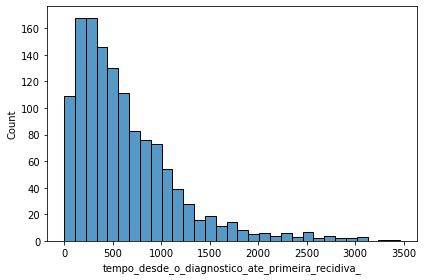

In [ ]:
### Analisar distribuição de resultados de recidiva
sns.histplot(
    dfrt,
    x="tempo_desde_o_diagnostico_ate_primeira_recidiva_"
)
plt.tight_layout()
plt.rcParams['figure.figsize']=(4,7)
#plt.savefig('distribuicao_tempo_diagnostico_recidiva.png')

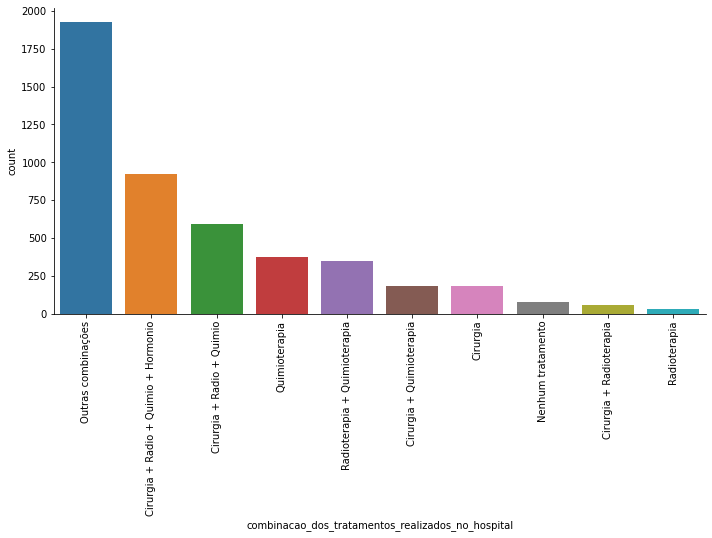

In [ ]:
### Analisar distribuição de tratamentos
sns.catplot(
    data=dfrt,
    x="combinacao_dos_tratamentos_realizados_no_hospital",
    kind="count",
    order = dfrt['combinacao_dos_tratamentos_realizados_no_hospital'].value_counts().index,
    aspect=2
)
plt.xticks(rotation=90)
#plt.savefig('distribuicao_combinacao_tratamentos.png', bbox_inches="tight")

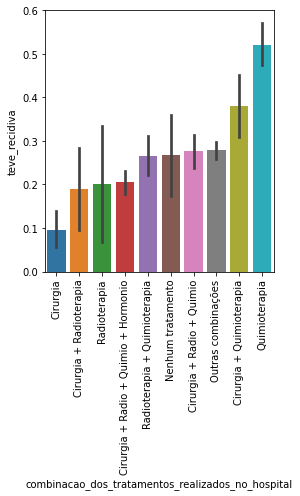

In [ ]:
#### Proporção de recidiva por combinação de tratamento
dfrt['teve_recidiva'] = np.where((dfrt['data_recidiva'].isnull()), 0, 1)

sns.barplot(
    data=dfrt,
    x="combinacao_dos_tratamentos_realizados_no_hospital",
    y="teve_recidiva",
    order=dfrt.groupby(["combinacao_dos_tratamentos_realizados_no_hospital"]).mean()["teve_recidiva"].sort_values().index
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.rcParams['figure.figsize']=(5,7)
#plt.savefig('proporcao_recidiva_por_tratamento.png')

### Combina as bases para análise conjunta

In [ ]:
dfpa = dfpa.rename(columns = {'Record_ID':'record_id'})
df_all = dfpa.merge(dfrt, how='inner', on='record_id')
df_all = df_all.merge(dfd, how='inner', on='record_id')
df_all = df_all.merge(dfh, how='inner', on='record_id')

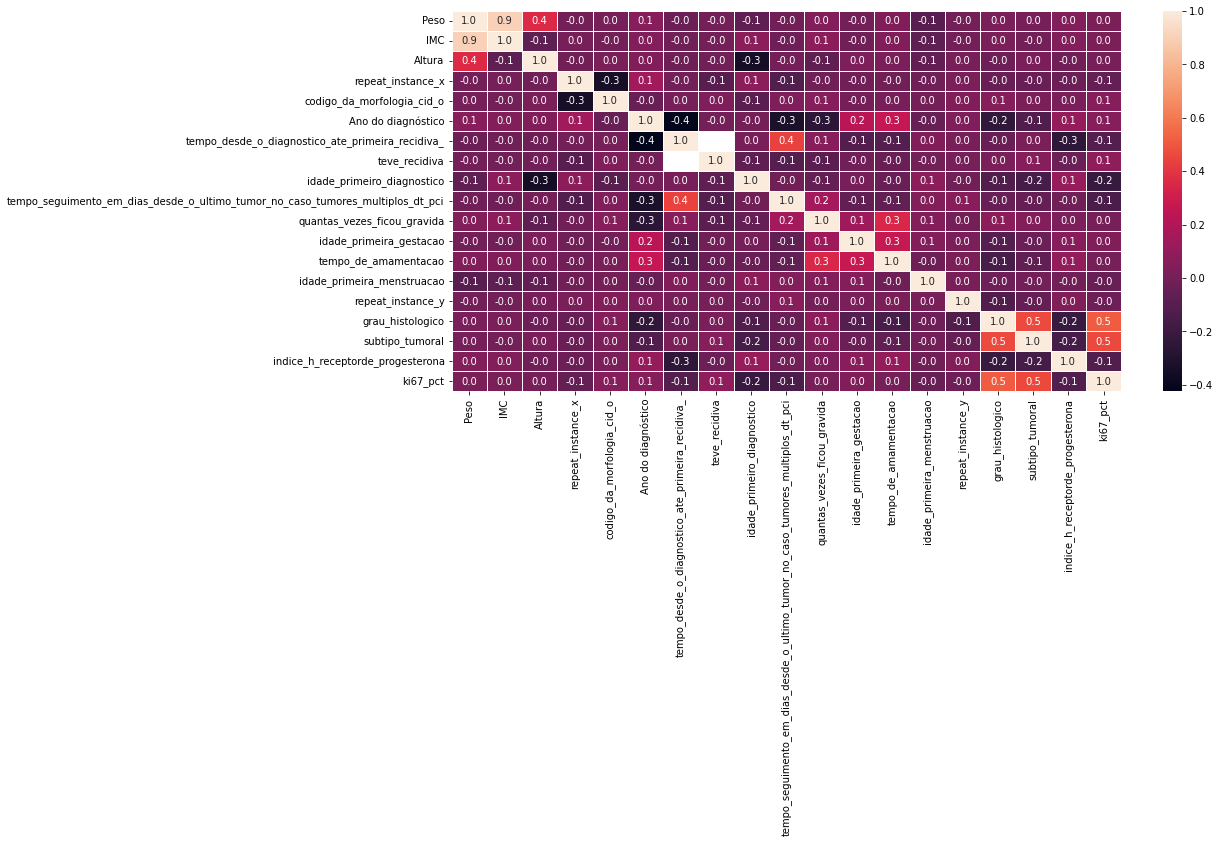

In [ ]:
df_all = df_all.drop(columns = 'record_id')
df_all = df_all.drop(columns = 'Repeat_Instance')
correlation = df_all.corr()
plt.figure(figsize=(15, 7))
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=0.6)
plt.show()

# 3.0 Levantamento de hipóteses:

1. ki67 está relacionado com subtipo tumoral e grau histológico, influenciando no tipo e no grau do tumor

2. Pacientes que possuem tumores multiplos tem uma recidiva maior

3. A relação entre cirurgia e reincidiva, como 




